### 2. Preprocessing 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
# The data saved after the preprocesing is loaded here 

In [3]:
# Loading dataset
data = pd.read_excel('Satisfaction_Pro.xlsx')

In [4]:
# viewing data
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,56,1,1,1,4,2,4,...,3,3,1,5,3,3,4,3,0,1
1,1,1,0,49,1,1,0,4,2,1,...,3,2,1,1,4,4,3,2,0,1
2,1,1,0,55,1,1,0,4,3,4,...,3,3,3,5,3,2,3,3,0,1
3,1,0,0,36,1,1,0,4,4,4,...,4,4,5,4,5,5,5,4,0,1
4,1,1,0,55,1,1,1,4,5,4,...,3,3,3,4,5,3,4,3,0,1


In [5]:
# checking shape of data
data.shape

(129880, 23)

### PCA - Principal Component analysis

In [6]:
### Splitting into target and features
X = data.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = data['satisfaction']
num_cols = ['Age']
std_scl = StandardScaler()
X.loc[:,num_cols] = std_scl.fit_transform(X[num_cols])

In [7]:
# applying PCA

pca = PCA(n_components=0.97)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca)

In [8]:
X_pca.shape

(129880, 15)

In [9]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.454065,0.476074,1.062268,-1.886534,1.308177,1.479876,-0.717506,0.906404,-1.729488,0.276225,0.159657,0.987102,0.344956,0.416727,-0.995454
1,3.508580,-1.080318,0.099585,0.181742,-1.143223,-0.834923,-0.680845,0.889300,-2.119839,1.783519,0.466397,-0.921879,2.012330,0.144491,0.834461
2,0.227236,1.022553,1.032322,-1.323872,1.863740,1.128394,0.503359,-0.258214,-0.307060,-0.123509,0.426767,0.109519,0.114702,0.359713,-0.340058
3,-3.030437,1.798212,-0.708016,0.375813,-0.932022,-0.267422,-0.596079,-0.399597,-0.217687,0.006740,-0.059611,-0.125692,0.134128,0.622024,-0.325754
4,-0.774665,2.552211,0.802454,-0.239208,0.236989,0.073338,0.648337,1.250967,-0.684955,-1.034628,0.965413,-0.241289,0.166131,0.292088,-0.624310


In [10]:
#implementing k-means
model = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=101)
model.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
# Visualize
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=model.labels_,palette='tab10')
plt.show()

In [11]:
# Trying PCA applied data to different machine learning models

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pca_df,y,test_size=0.2,random_state=42)

In [13]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
#finding accuracy
lr_acc = accuracy_score(y_test, y_pred_logit)

In [14]:
lr_acc

0.868570988604866

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

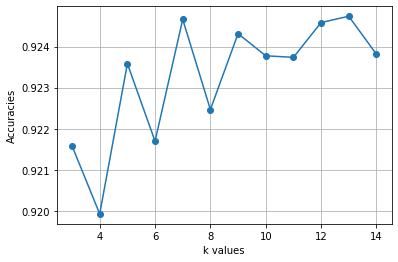

In [17]:
# plotting k values vs accuracy score to check k with highest accuracy
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [18]:
metric_k

[0.9215814598090545,
 0.9199260856174931,
 0.9235833076686172,
 0.9216969510317216,
 0.9246612257468433,
 0.9224668925161688,
 0.9243147520788421,
 0.923775793039729,
 0.9237372959655066,
 0.9245842315983985,
 0.9247382198952879,
 0.9238142901139513]

In [19]:
# creating model kNN
classifier = KNeighborsClassifier(n_neighbors=13)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)
# finding accuracy
knn_acc = accuracy_score(y_test, y_pred_kNN)

In [20]:
from sklearn.tree import DecisionTreeClassifier
# creating model Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
# finding accuracy
dt_acc = accuracy_score(y_test, y_pred_dt)

In [21]:
from sklearn.ensemble import RandomForestClassifier
# model training Random Forest
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
# finding accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)

In [22]:
summary_lr = pd.DataFrame([[lr_acc],[knn_acc],[dt_acc],[rf_acc]],index=['Logistic Regression','kNN','Decision Tree','Random Forest'],columns=['Accuracy Score'])
summary_lr

,Accuracy Score
Logistic Regression,0.868571
kNN,0.924738
Decision Tree,0.883546
Random Forest,0.926124


#### Accuracy has gone down which shows that PCA does not have a good effect on our selected data

### Cross Validation

### Logistic Regression Stratified k-Fold (MinMax Scaling)

In [23]:
### Splitting into target and features
X = data.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = data['satisfaction']
num_cols = ['Age']
#standard Scaling
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X.loc[:,num_cols] = min_max_scaler.fit_transform(X[num_cols])
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:

# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)
#finding accuracy
lr_acc_std = accuracy_score(y_test, y_pred_logit)

C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
lr_acc_std

0.8916692331382815

In [26]:
# Applying Stratified k-Fold
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_lr = cross_val_score(logit_model, X, y, cv=skfold_validator)
skcv_result_lr

C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\akshathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

array([0.61572221, 0.83915922, 0.82722513, 0.95688328, 0.82922698,
       0.97243609, 0.92408377, 0.89582692, 0.9092239 , 0.47351401])

#### Average score of stratified k-fold cross validation Logistic regression(Minmax Scaling)

In [27]:
skcv_result_lr = np.mean(skcv_result_lr)
print('Average accuracy score of stratified (Logistic Regression)',skcv_result_lr)

Average accuracy score of stratified (Logistic Regression) 0.824330150908531


### kNN Stratified k-Fold (Minmax Scaler)

In [28]:
### Splitting into target and features
X = data.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = data['satisfaction']
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X.loc[:,num_cols] = min_max_scaler.fit_transform(X[num_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating model
classifier = KNeighborsClassifier(n_neighbors=9)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)
knn_acc_nor = accuracy_score(y_test, y_pred_kNN)  

In [29]:
knn_acc_nor

0.9305897751770865

In [30]:
# Applying Stratified k-Fold
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_knn = cross_val_score(classifier, X, y, cv=skfold_validator)
skcv_result_knn

array([0.69818294, 0.87950416, 0.79912227, 0.95072374, 0.67985833,
       0.94756698, 0.87873422, 0.85586695, 0.9263166 , 0.75685248])

#### Average score of stratified k-fold cross validation kNN(Minmax)

In [31]:
skcv_result_knn = np.mean(skcv_result_knn)
print('Average accuracy score of stratified (kNN)',skcv_result_knn)

Average accuracy score of stratified (kNN) 0.837272867262088


### Random Forest Stratified k-Fold

In [32]:
### Splitting into target and features
X = data.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = data['satisfaction']
# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
# model training Random Forest
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
# finding accuracy
rf_acc_ws = accuracy_score(y_test, y_pred_rf)

In [34]:
rf_acc_ws

0.9554973821989529

In [35]:
# Applying Stratified k-Fold
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_rf = cross_val_score(rf_clf, X, y, cv=skfold_validator)
skcv_result_rf

array([0.6408223 , 0.85740684, 0.80736064, 0.97682476, 0.6249615 ,
       0.98005852, 0.87134278, 0.77918078, 0.87596243, 0.7118879 ])

#### Average score of stratified k-fold cross validation Random Forest

In [36]:
skcv_result_rf = np.mean(skcv_result_rf)
print('Average accuracy score of stratified (Random Forest)',skcv_result_rf)

Average accuracy score of stratified (Random Forest) 0.8125808438558669


### Decision Tree Stratified k-Fold

In [37]:

### Splitting into target and features
X = data.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = data['satisfaction']
# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# creating model Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
# finding accuracy
dt_acc_ws = accuracy_score(y_test, y_pred_dt)

In [38]:
dt_acc_ws

0.9417154296273483

In [39]:
# Applying Stratified k-Fold
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_dt = cross_val_score(dt_clf, X, y, cv=skfold_validator)
skcv_result_dt

array([0.63566369, 0.74815214, 0.80782261, 0.97097321, 0.6197259 ,
       0.93609486, 0.78849707, 0.7171235 , 0.86395134, 0.65760702])

#### Average score of stratified k-fold cross validation Decision Tree

In [40]:
skcv_result_dt = np.mean(skcv_result_dt)
print('Average accuracy score of stratified (Decision Tree)',skcv_result_dt)

Average accuracy score of stratified (Decision Tree) 0.7745611333538651


In [41]:
summary_cv = pd.DataFrame([[skcv_result_lr],[skcv_result_knn],[skcv_result_dt],[skcv_result_rf]],index=['Logistic Regression','kNN','Decision Tree','Random Forest'],columns=['Accuracy Score'])
summary_cv

,Accuracy Score
Logistic Regression,0.824330
kNN,0.837273
Decision Tree,0.774561
Random Forest,0.812581


#### Mean values of cross validation shows kNN is the best, and logistic regression is the second best and next is Random Forest. But when analysing the accuracy scores and time taken to run the algorithm, we finally chose Random Forest Algorithm to build our model.